# **Load and write Pandas Dataframe faster, securely and efficiently with Parquet.**
## *Showdown: TSV vs Pickle vs Parquet* 

<br>

## Aishvarya Tandon
### Czodrowski Lab - "5 minutes of fame"
### 20 August 2021

In [1]:
import pandas as pd
import time
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt

#in-house packages
from selfie_tools import vectorized as stv, single as sts

## Part 1

In [2]:
#Reading tsv from 'read_csv()' function
start = time.time()
df = pd.read_csv("canonical-smiles_Chembl29.tsv", sep = '\t')
end = time.time()

tsv_readtime_1 = end - start
print(f"Time taken to read a CHEMBL29 tsv file by standard 'read_csv()' function: {tsv_readtime_1} seconds")

Time taken to read a CHEMBL29 tsv file by standard 'read_csv()' function: 1.5461173057556152 seconds


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084724 entries, 0 to 2084723
Data columns (total 2 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   molregno          int64 
 1   canonical_smiles  object
dtypes: int64(1), object(1)
memory usage: 31.8+ MB


,molregno,canonical_smiles
0,1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl
1,2,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1
2,3,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1
3,4,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1
4,5,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1


In [4]:
#TSV writing time
start = time.time()
df.to_csv('Copy_df.tsv', sep = '\t', index = False)
end = time.time()

tsv_writetime_1 = end - start
print(f"Time taken to write a CHEMBL29 dataframe to a standard tsv file by the Pandas 'to_csv()' function: {tsv_writetime_1} seconds")

Time taken to write a CHEMBL29 dataframe to a standard tsv file by the Pandas 'to_csv()' function: 3.0059814453125 seconds


In [5]:
file_size_tsv_1 = os.path.getsize('Copy_df.tsv')

In [6]:
print(file_size_tsv_1)

138027283


In [7]:
#Writing time to pickle
start = time.time()
df.to_pickle('Copy_df.pkl')
end = time.time()
pickle_writetime_1 = end - start
print(f"Time taken to write a CHEMBL29 dataframe as a pickled object file by the Pandas 'to_pickle()' function: {pickle_writetime_1} seconds")

Time taken to write a CHEMBL29 dataframe as a pickled object file by the Pandas 'to_pickle()' function: 0.6066086292266846 seconds


In [8]:
file_size_pickle_1 = os.path.getsize('Copy_df.pkl')
print(file_size_pickle_1)

143258753


In [9]:
#Writing time to parquet
start = time.time()
df.to_parquet('Copy_df.gzip', compression='gzip')
end = time.time()
parquet_writetime_1 = end - start
print(f"Time taken to write a CHEMBL29 dataframe to the binary parquet format by the Pandas 'to_parquet()' function: {parquet_writetime_1} seconds")

Time taken to write a CHEMBL29 dataframe to the binary parquet format by the Pandas 'to_parquet()' function: 8.451149940490723 seconds


In [10]:
file_size_parquet_1 = os.path.getsize('Copy_df.gzip')
print(file_size_parquet_1)

29168847


In [11]:
#Reading pickle df
start = time.time()
unpickled_df = pd.read_pickle("Copy_df.pkl")
end = time.time()
pickle_readtime_1 = end - start
print(f"Time taken to read a CHEMBL29 pickled file by 'read_pickle()' function: {pickle_readtime_1} seconds")

Time taken to read a CHEMBL29 pickled file by 'read_pickle()' function: 0.3565945625305176 seconds


In [12]:
unpickled_df.head()

,molregno,canonical_smiles
0,1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl
1,2,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1
2,3,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1
3,4,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1
4,5,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1


In [13]:
#Reading parquet df
start = time.time()
parquet_df = pd.read_parquet("/home/tandon/DL/Fun+Learning/5minsFame/Df_Parquet/Copy_df.gzip")
end = time.time()
parquet_readtime_1 = end - start
print(f"Time taken to read a CHEMBL29 parquet file by 'read_parquet()' function: {parquet_readtime_1} seconds")

Time taken to read a CHEMBL29 parquet file by 'read_parquet()' function: 1.2722344398498535 seconds


In [14]:
parquet_df.head()

,molregno,canonical_smiles
0,1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl
1,2,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1
2,3,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1
3,4,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1
4,5,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1


In [15]:
plot_values = [parquet_readtime_1, pickle_readtime_1, tsv_readtime_1]
plot_headers = ['Parquet Read Time' , 'Pickle Read Time', 'TSV Read Time']

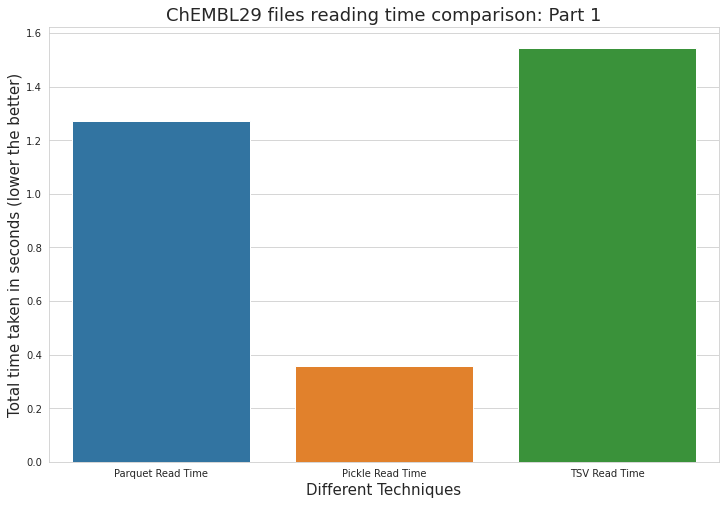

In [16]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.barplot(x = plot_headers, y = plot_values)
plt.title("ChEMBL29 files reading time comparison: Part 1", size=18)
plt.xlabel("Different Techniques", size=15)
plt.ylabel("Total time taken in seconds (lower the better)", size=15)

plt.show()

In [17]:
plot_values = [parquet_writetime_1, pickle_writetime_1, tsv_writetime_1]
plot_headers = ['Parquet Write Time' , 'Pickle Write Time', 'TSV Write Time']

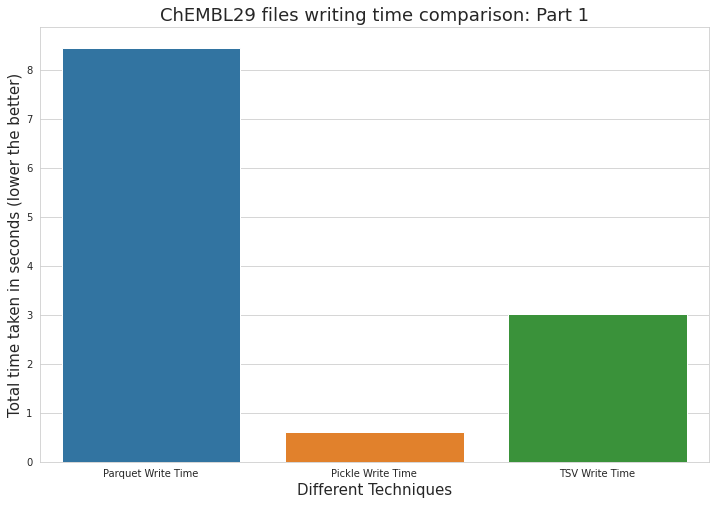

In [18]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.barplot(x = plot_headers, y = plot_values)
plt.title("ChEMBL29 files writing time comparison: Part 1", size=18)
plt.xlabel("Different Techniques", size=15)
plt.ylabel("Total time taken in seconds (lower the better)", size=15)

plt.show()

In [19]:
plot_values = [file_size_parquet_1, file_size_pickle_1, file_size_tsv_1]
plot_headers = ['Parquet (gzip) File Size ' , 'Pickle File Size', 'TSV File Size']

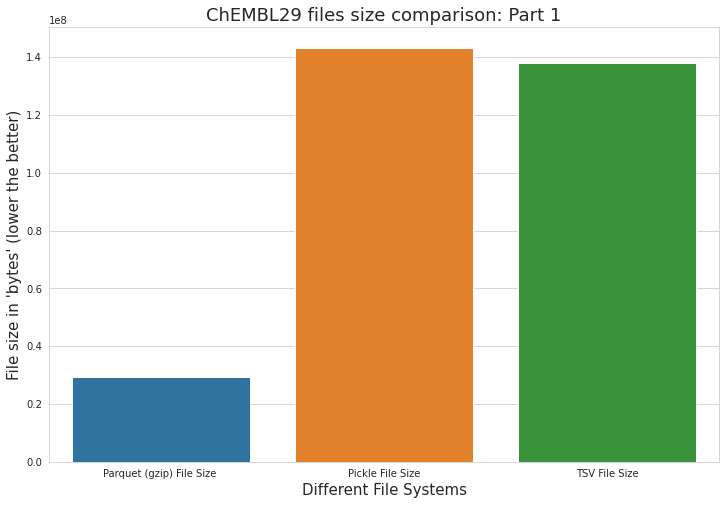

In [20]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.barplot(x = plot_headers, y = plot_values)
plt.title("ChEMBL29 files size comparison: Part 1", size=18)
plt.xlabel("Different File Systems", size=15)
plt.ylabel("File size in 'bytes' (lower the better)", size=15)

plt.show()

## Part 2

In [21]:
###Performing column operations using in-house packages

df.rename(columns = {'canonical_smiles':'Smiles'}, inplace = True)
df = stv.add_selfies(df)
df = stv.add_selfies_list(df)
df.head()

,molregno,Smiles,Selfies,Selfies_List,Selfies_Len
0,1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",36
1,2,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",39
2,3,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",41
3,4,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,[C][C][=C][C][=C][Branch2_1][Ring1][O][C][Bran...,"[[C], [C], [=C], [C], [=C], [Branch2_1], [Ring...",39
4,5,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",38


In [22]:
#Writing time tsv 2
start = time.time()
df.to_csv('Copy_wider_df.tsv', sep = '\t', index = False)
end = time.time()
tsv_writetime_2 = end - start
print(f"Time taken to write a wider CHEMBL29 dataframe to a standard tsv file by the Pandas 'to_csv()' function: {tsv_writetime_2} seconds")

Time taken to write a wider CHEMBL29 dataframe to a standard tsv file by the Pandas 'to_csv()' function: 29.68435573577881 seconds


In [23]:
file_size_tsv_2 = os.path.getsize('Copy_wider_df.tsv')
print(file_size_tsv_2)

1674276192


In [24]:
#Reading time tsv 2
start = time.time()
df_wider_tsv = pd.read_csv('Copy_wider_df.tsv', sep = '\t')
end = time.time()
tsv_readtime_2 = end - start
print(f"Time taken to read a wider CHEMBL29 tsv file by standard 'read_csv()' function: {tsv_readtime_2} seconds")

Time taken to read a wider CHEMBL29 tsv file by standard 'read_csv()' function: 13.362464427947998 seconds


In [25]:
df_wider_tsv.head()
#Notice that elements under the column 'Selfies_List' are somehow compromised

,molregno,Smiles,Selfies,Selfies_List,Selfies_Len
0,1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"['[C]', '[C]', '[=C]', '[C]', '[Branch1_1]', '...",36
1,2,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"['[C]', '[C]', '[=C]', '[C]', '[Branch1_1]', '...",39
2,3,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"['[C]', '[C]', '[=C]', '[C]', '[Branch1_1]', '...",41
3,4,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,[C][C][=C][C][=C][Branch2_1][Ring1][O][C][Bran...,"['[C]', '[C]', '[=C]', '[C]', '[=C]', '[Branch...",39
4,5,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"['[C]', '[C]', '[=C]', '[C]', '[Branch1_1]', '...",38


In [26]:
df['Selfies_List'][0]

['[C]',
 '[C]',
 '[=C]',
 '[C]',
 '[Branch1_1]',
 '[=N]',
 '[N]',
 '[N]',
 '[=C]',
 '[C]',
 '[Branch1_2]',
 '[C]',
 '[=O]',
 '[NHexpl]',
 '[C]',
 '[Ring1]',
 '[Branch1_3]',
 '[=O]',
 '[=C]',
 '[C]',
 '[=C]',
 '[Ring1]',
 '[=C]',
 '[C]',
 '[Branch1_2]',
 '[C]',
 '[=O]',
 '[C]',
 '[=C]',
 '[C]',
 '[=C]',
 '[C]',
 '[=C]',
 '[Ring1]',
 '[Branch1_2]',
 '[Cl]']

In [27]:
type(df['Selfies_List'][0])

list

In [28]:
df_wider_tsv['Selfies_List'][0]

"['[C]', '[C]', '[=C]', '[C]', '[Branch1_1]', '[=N]', '[N]', '[N]', '[=C]', '[C]', '[Branch1_2]', '[C]', '[=O]', '[NHexpl]', '[C]', '[Ring1]', '[Branch1_3]', '[=O]', '[=C]', '[C]', '[=C]', '[Ring1]', '[=C]', '[C]', '[Branch1_2]', '[C]', '[=O]', '[C]', '[=C]', '[C]', '[=C]', '[C]', '[=C]', '[Ring1]', '[Branch1_2]', '[Cl]']"

In [29]:
type(df_wider_tsv['Selfies_List'][0])

str

In [30]:
#Writing time to pickle 2
start = time.time()
df.to_pickle('Copy_wider_df.pkl')
end = time.time()
pickle_writetime_2 = end - start
print(f"Time taken to write a wider CHEMBL29 dataframe as a pickled object file  by the Pandas 'to_pickle()' function: {pickle_writetime_2} seconds")

Time taken to write a wider CHEMBL29 dataframe as a pickled object file  by the Pandas 'to_pickle()' function: 35.71731519699097 seconds


In [31]:
#Reading pickle df 2
start = time.time()
unpickled_wider_df = pd.read_pickle("Copy_wider_df.pkl")
end = time.time()
pickle_readtime_2 = end - start
print(f"Time taken to read a CHEMBL29 pickled file by 'read_pickle()' function: {pickle_readtime_2} seconds")

Time taken to read a CHEMBL29 pickled file by 'read_pickle()' function: 18.587334394454956 seconds


In [32]:
unpickled_wider_df.head()
#Details maintained

,molregno,Smiles,Selfies,Selfies_List,Selfies_Len
0,1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",36
1,2,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",39
2,3,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",41
3,4,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,[C][C][=C][C][=C][Branch2_1][Ring1][O][C][Bran...,"[[C], [C], [=C], [C], [=C], [Branch2_1], [Ring...",39
4,5,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",38


In [33]:
file_size_pickle_2 = os.path.getsize('Copy_wider_df.pkl')
print(file_size_pickle_2)

1597908168


In [34]:
#Writing time to parquet 2
start = time.time()
df.to_parquet('Copy_wider_df.gzip', compression='gzip')
end = time.time()
parquet_writetime_2 = end - start
print(f"Time taken to write a wider CHEMBL29 dataframe to the binary parquet format by the Pandas 'to_parquet()' function: {parquet_writetime_2} seconds")

Time taken to write a wider CHEMBL29 dataframe to the binary parquet format by the Pandas 'to_parquet()' function: 41.652668714523315 seconds


In [35]:
#Reading parquet df 2 
start = time.time()
parquet_wider_df = pd.read_parquet("Copy_wider_df.gzip")
end = time.time()
parquet_readtime_2 = end - start
print(f"Time taken to read a wider CHEMBL29 parquet file by 'read_parquet()' function: {parquet_readtime_2} seconds")

Time taken to read a wider CHEMBL29 parquet file by 'read_parquet()' function: 8.457916975021362 seconds


In [36]:
parquet_wider_df.head()
#Details maintained

,molregno,Smiles,Selfies,Selfies_List,Selfies_Len
0,1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",36
1,2,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",39
2,3,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",41
3,4,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,[C][C][=C][C][=C][Branch2_1][Ring1][O][C][Bran...,"[[C], [C], [=C], [C], [=C], [Branch2_1], [Ring...",39
4,5,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,[C][C][=C][C][Branch1_1][=N][N][N][=C][C][Bran...,"[[C], [C], [=C], [C], [Branch1_1], [=N], [N], ...",38


In [37]:
file_size_parquet_2 = os.path.getsize('Copy_wider_df.gzip')
print(file_size_parquet_2)

116562907


In [38]:
plot_values = [parquet_readtime_2, pickle_readtime_2, tsv_readtime_2]
plot_headers = ['Parquet Read Time' , 'Pickle Read Time', 'TSV Read Time']

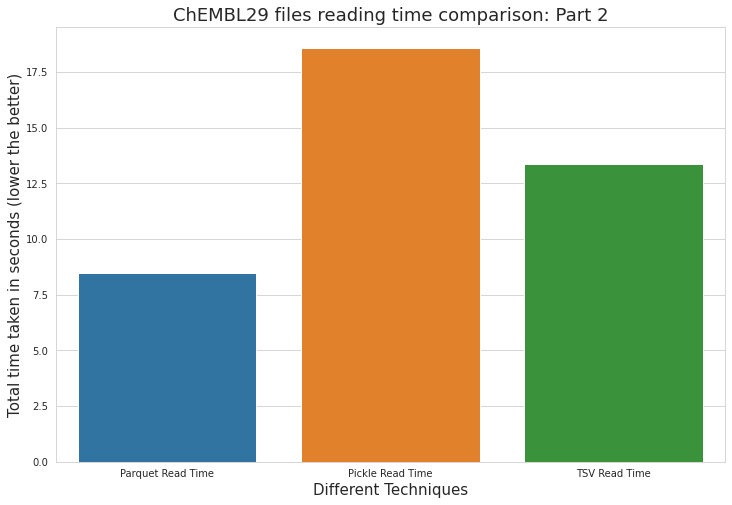

In [39]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.barplot(x = plot_headers, y = plot_values)
plt.title("ChEMBL29 files reading time comparison: Part 2", size=18)
plt.xlabel("Different Techniques", size=15)
plt.ylabel("Total time taken in seconds (lower the better)", size=15)

plt.show()

In [40]:
plot_values = [parquet_writetime_2, pickle_writetime_2, tsv_writetime_2]
plot_headers = ['Parquet Write Time' , 'Pickle Write Time', 'TSV Write Time']

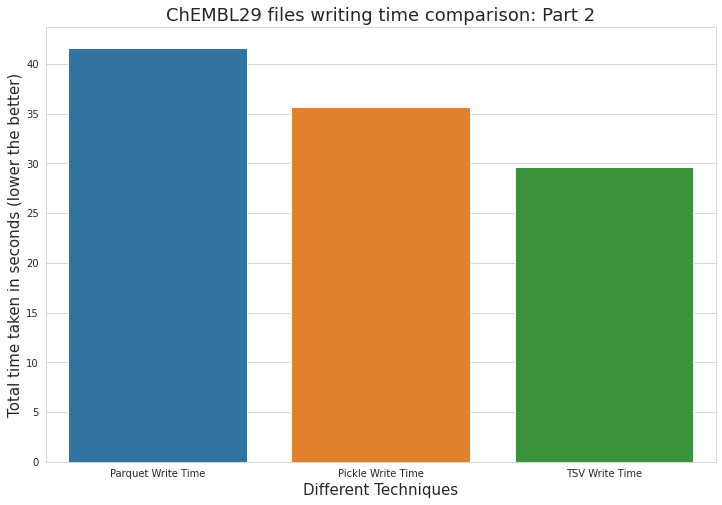

In [41]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.barplot(x = plot_headers, y = plot_values)
plt.title("ChEMBL29 files writing time comparison: Part 2", size=18)
plt.xlabel("Different Techniques", size=15)
plt.ylabel("Total time taken in seconds (lower the better)", size=15)

plt.show()

In [42]:
plot_values = [file_size_parquet_2, file_size_pickle_2, file_size_tsv_2]
plot_headers = ['Parquet (gzip) File Size ' , 'Pickle File Size', 'TSV File Size']

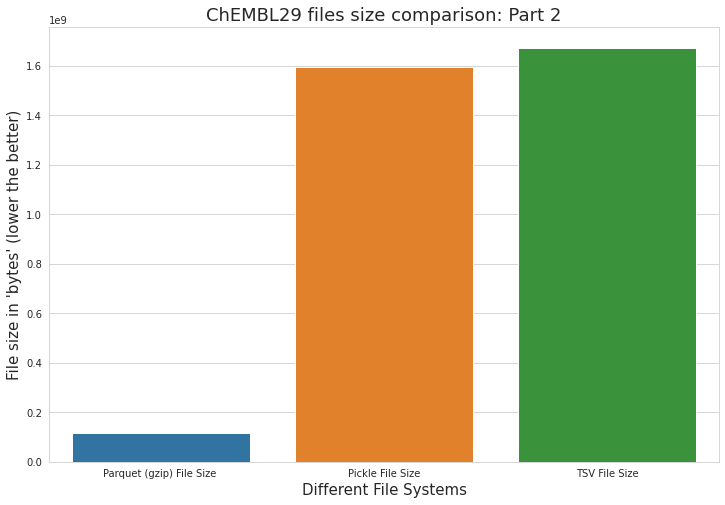

In [43]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.barplot(x = plot_headers, y = plot_values)
plt.title("ChEMBL29 files size comparison: Part 2", size=18)
plt.xlabel("Different File Systems", size=15)
plt.ylabel("File size in 'bytes' (lower the better)", size=15)

plt.show()

### What is 'Parquet'?

*Apache Parquet (Copyright 2018 Apache Software Foundation), is a "columnar storage format available to any project in the Hadoop ecosystem, regardless of the choice of data processing framework, data model or programming language."*

## What does Pandas user document says about Parquet?

*Apache Parquet provides a partitioned binary columnar serialization for data frames. It is designed to make reading and writing data frames efficient, and to make sharing data across data analysis languages easy. Parquet can use a variety of compression techniques to shrink the file size as much as possible while still maintaining good read performance.*

*Parquet is designed to faithfully serialize and de-serialize DataFrames, supporting all of the pandas dtypes, including extension dtypes such as datetime with tz.*

### Prerequisites? 

Installation of Pandas and an engine such as 'pyarrow' (conda install pyarrow -c conda-forge) on the running environment.

## Useful links:

1. https://parquet.apache.org/
2. https://en.wikipedia.org/wiki/Column-oriented_DBMS
3. https://datascience.stackexchange.com/questions/8244/what-makes-columnar-databases-suitable-for-data-science/9242
4. https://www.datacamp.com/community/tutorials/pickle-python-tutorial (Section of interest: **When Not to Use pickle**)